In [1]:
from torchvision.datasets.utils import download_and_extract_archive
from PIL import Image
import os
from tqdm import tqdm

dataset_name = "blackwhite"

_URL = f'https://openaipublic.azureedge.net/clip/data/country211.tgz' #Country211 dataset from OpenAI. Size: 10GB.
download_and_extract_archive(_URL, download_root = './temp_folder', remove_finished=True)

  0%|          | 0/11000241947 [00:00<?, ?it/s]

Extracting ./temp_folder/country211.tgz to ./temp_folder


Allow ~15min for the whole dataset to download and be extracted.

In [2]:
train_path = [] #path for train images we downloaded
test_path = [] #path for test images we downloaded
val_path = [] #path for val images we downloaded

#TRAIN PATHS
for root, dirs, files in os.walk('./temp_folder/country211/train'):
    for name in files:
        train_path.append(root + '/' + name)

#TEST PATHS
for root, dirs, files in os.walk('./temp_folder/country211/test'):
    for name in files:
        test_path.append(root + '/' + name)


#VAL PATHS
for root, dirs, files in os.walk('./temp_folder/country211/valid'):
    for name in files:
        val_path.append(root + '/' + name)

print("Number of train images:", len(train_path)," ; Number of test images:",  len(test_path)," ; Number of validation images:", len(val_path))

Number of train images: 31650  ; Number of test images: 21100  ; Number of validation images: 10550


We won't keep all images for training our GANs. For a starter, we'll take 400/100/110 images of train/test/val data.

Before processing, we'll need to convert all of our image in black& white and concatenate them, the same was as it is done in pix2pix.

In [3]:
parent_dir = './'
directory = 'images'
path = os.path.join(parent_dir, directory)
try : 
    os.mkdir(path)
except OSError as error: #to avoid raising an error in case the folder already exists
    print(error)  

parent_dir = './images'
directory = 'blackwhite'
path = os.path.join(parent_dir, directory)
try : 
    os.mkdir(path)
except OSError as error: #to avoid raising an error in case the folder already exists
    print(error)  

parent_dir = './images/blackwhite'
directory = 'train'
path = os.path.join(parent_dir, directory)
try : 
    os.mkdir(path)
except OSError as error: #to avoid raising an error in case the folder already exists
    print(error)  

parent_dir = './images/blackwhite'
directory = 'test'
path = os.path.join(parent_dir, directory)
try : 
    os.mkdir(path)
except OSError as error: #to avoid raising an error in case the folder already exists
    print(error)  

parent_dir = './images/blackwhite'
directory = 'val'
path = os.path.join(parent_dir, directory)
try : 
    os.mkdir(path)
except OSError as error: #to avoid raising an error in case the folder already exists
    print(error)  

[Errno 17] File exists: './images'
[Errno 17] File exists: './images/blackwhite'
[Errno 17] File exists: './images/blackwhite/train'
[Errno 17] File exists: './images/blackwhite/test'
[Errno 17] File exists: './images/blackwhite/val'


In [4]:
n_train = -1 #We'll keep all training images
n_test = -1 #We'll keep all testing images
n_val = -1 #We'll keep all val images

def get_concat_h(im1, im2):
    '''
    To concatenate two images together in PIL.'''
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def create_bw_image(img_path):
    '''
    To create a black and white version of an image and concatenate it horizontally to the new image. Output should have 256x512 shape (two images of shape 256x256 next to each other).'''
    img = Image.open(img_path)
    img = img.resize((256,256))
    img2 = img.convert("L")
    return get_concat_h(img, img2)

def generate_bw_dataset(list_path, n = -1, mode = 'train'):
    '''
    To generate the whole black and whites datasets. If user wants to use whole dataset, sets n=-1. Else, n corresponds to the numbers of images to keep from given dataset.'''
    if n == -1: #If we state n =-1, we keep all images from dataset.
        n = len(list_path)
    i = 0
    for path in tqdm(list_path[:n]):
        i += 1
        img = create_bw_image(path)
        img.save(f'./images/blackwhite/{mode}/{i}.jpg', )
    print(f'{mode} set generated.')

Let's see what is the transformation operated by our above algorithm:


Untransformed image:


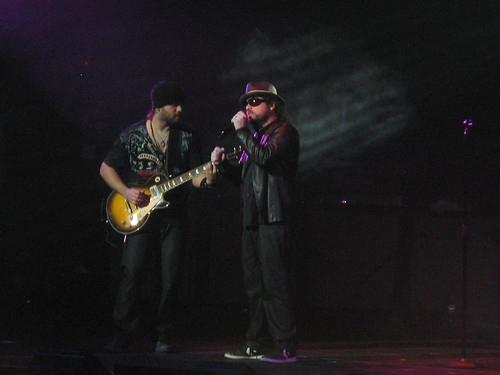

Transformed image for pix2pix format:


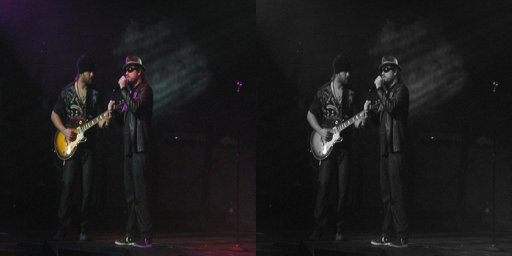

In [5]:
from PIL import Image
img_path_test = train_path[0]
img = Image.open(img_path_test)
print('Untransformed image:')
display(img)
img_transformed = create_bw_image(img_path_test)
print('Transformed image for pix2pix format:')
display(img_transformed)

In [6]:
generate_bw_dataset(train_path, n_train, mode = 'train')
generate_bw_dataset(test_path, n_test, mode = 'test')
generate_bw_dataset(val_path, n_val, mode = 'val')

100%|██████████| 31650/31650 [06:43<00:00, 78.39it/s]


train set generated.


100%|██████████| 21100/21100 [04:28<00:00, 78.55it/s]


test set generated.


100%|██████████| 10550/10550 [02:14<00:00, 78.37it/s]

val set generated.


And... done! Our black&white dataset is built under the path ./images/blackwhite/.